# Лабораторна робота №3
__Тема__: Лінійна регресія.

## Завдання 1
Завантадити датасет «Diabetes Dataset», провести попередній аналіз данних та побудувати модель лінійної регресії і RandomForest регресії на основі більш корелюючих ознак.


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
# 1. Load the diabetes dataset
df = pd.DataFrame(load_diabetes().data, columns=load_diabetes().feature_names)
df['target'] = load_diabetes().target

# Display the first 5 rows
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
# 2. Check for missing values
print('Missing values:')
print(df.isnull().sum())

# 3. Check for duplicates
print('Duplicated rows:')
print(df.duplicated().sum())
df = df.drop_duplicates()

# 4. Check for data types and convert to numerical if necessary
print('Data types:')
print(df.dtypes)



Missing values:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64
Duplicated rows:
0
Data types:
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


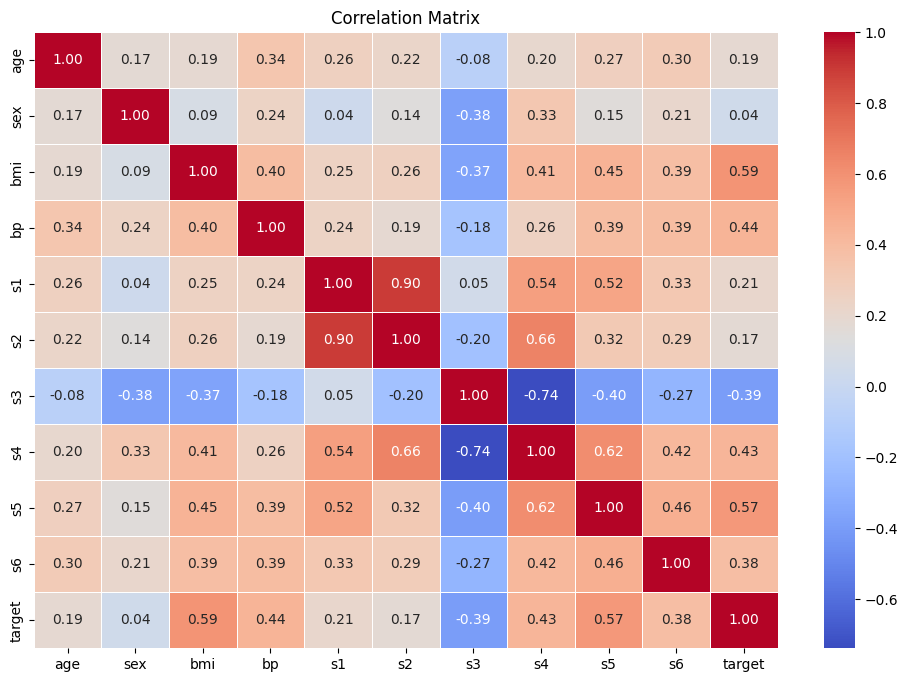

In [7]:
# 5. Make correlation matrix heatmap
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Print the correlation values with the target variable in descending order
print(correlation_matrix['target'].sort_values(ascending=False))

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


Можемо побачити з кореляції, що існує суттєвий зв'язок між прогресом діабету та ***Індексом маси тіла***, а також рівнем ***тригліцеридів*** (S5). Також з матриці можемо побачити зворотній зв'язок між всіма параметрами та рівнем ***Ліпопротеїнів високої щільності*** (S3).

Датасет не потребує масштабування, оскільки він вже був попередньо масштабованим методом середньоквадратичнього відхилення, помноженого на квадратний корінь.

In [26]:
# 6. Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train and evaluate the models

# 7.1. Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Evaluate the model
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print('Linear Regression:')
print(f'Mean Squared Error (lower is better): {mse_lin:.2f}')
print(f'R2 Score (higher is better): {r2_lin:.2f}')

# 7.2. Train a random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('\nRandom Forest:')
print(f'Mean Squared Error (lower is better): {mse_rf:.2f}')
print(f'R2 Score (higher is better): {r2_rf:.2f}')

Linear Regression:
Mean Squared Error (lower is better): 2900.19
R2 Score (higher is better): 0.45

Random Forest:
Mean Squared Error (lower is better): 2952.01
R2 Score (higher is better): 0.44


In [27]:
# 7.3. Train using selected features
X = df[['bmi', 's5', 'bp']]
Y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print('Linear Regression:')
print(f'Mean Squared Error (lower is better): {mse_lin:.2f}')
print(f'R2 Score (higher is better): {r2_lin:.2f}')

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('\nRandom Forest:')
print(f'Mean Squared Error (lower is better): {mse_rf:.2f}')
print(f'R2 Score (higher is better): {r2_rf:.2f}')

Linear Regression:
Mean Squared Error (lower is better): 2891.04
R2 Score (higher is better): 0.45

Random Forest:
Mean Squared Error (lower is better): 2876.38
R2 Score (higher is better): 0.46


Шляхом ручного підбору було визначенно, що тренування з використанням лише ознак `['bmi', 's5', 'bp']` дає найкращий результат.

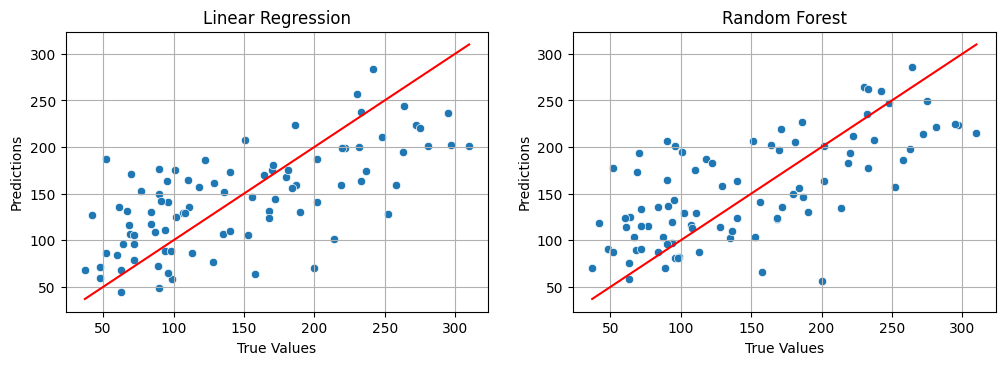

In [29]:
# 8. Plot the predictions
plt.figure(figsize=(12, 8))

# Scatter plot of Linear Regression
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lin)
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red')
plt.title('Linear Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)

# Scatter plot of Random Forest
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf)
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red')
plt.title('Random Forest')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
